In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fastai import *
from fastai.vision import *

%matplotlib inline

In [2]:
path = "../data/train_data/"
test_df = pd.read_csv("../data/test_WyRytb0.csv")
sample_sub = pd.read_csv("../data/sample_submission_CH2mq5Z.csv")
df = pd.read_csv("../data/train/train.csv")
bs = 64

In [3]:
tfms = get_transforms(flip_vert=True,max_zoom=1.0,max_warp=0.5,max_rotate=25,do_flip=True)

In [4]:
data = (ImageList.from_csv(path, csv_name = '../train/train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test_data/')              
        .transform(tfms, size=128)
        .databunch(num_workers=7)).normalize()

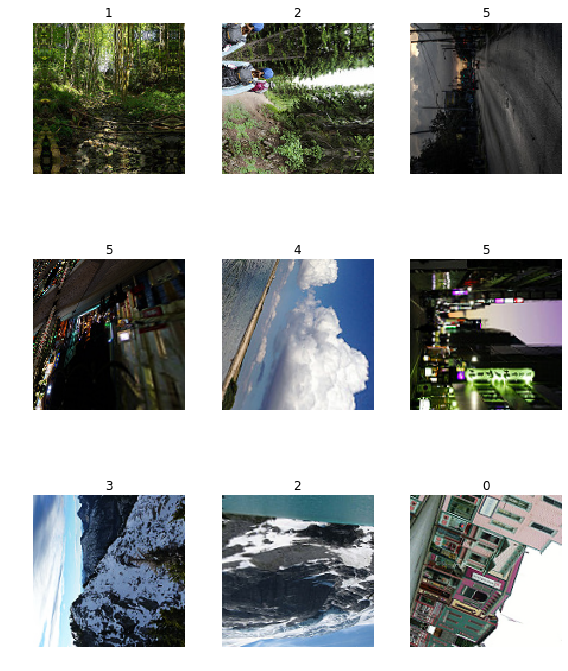

In [5]:
data.show_batch(rows=3, figsize=(8,10))

In [6]:
learn = cnn_learner(data, models.densenet201, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.572075,0.332446,0.122725,0.877275,02:32
1,0.436267,0.316576,0.109219,0.890781,02:16


In [ ]:
learn.save("../model/desnenet201_10_aug")

In [ ]:
# Getting the predictions
preds,_ = learn.get_preds(ds_type=DatasetType.Test)

labelled_preds = []
for pred in preds:
    labelled_preds.append(int(np.argmax(pred)))

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

In [ ]:
preds,_ = learn.get_preds(ds_type=DatasetType.Train)

In [ ]:
np.argmax(preds,axis=1)

In [ ]:
train_df = pd.read_csv("../data/train/train.csv")
train_df.head()

In [ ]:
preds